# W207 Final Project
## Home Price Prediction
Mona Iwamoto, Michelle Kim, Alex Lau, Alex Nocella

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

train_raw = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#make dummy variables
train_all = pd.get_dummies(train_raw)

#fill in missing with the mean of the column
train_all = train_all.fillna(train_all.mean())

#experimenting with some transformations here?
train_all['GrLivAreaSq'] = train_all['GrLivArea']**2

print train_all.shape

# split train into train and dev
train = train_all[:1000]
dev = train_all[1000:]

# Split into input and output dataframes.
train_X, train_y = train.loc[:, train.columns !='SalePrice'], train.loc[:, train.columns == 'SalePrice']
dev_X, dev_y = dev.loc[:, dev.columns != 'SalePrice'], dev.loc[:, dev.columns == 'SalePrice']

train_X = train_X.loc[:, train_X.columns !='Id']
dev_X = dev_X.loc[:, dev_X.columns != 'Id']

train_X = train_X[:train_X.shape[0]]
train_y = train_y.SalePrice

dev_X = dev_X[:dev_X.shape[0]]
dev_y = dev_y.SalePrice

print train_X.shape
print train_y.shape
print dev_X.shape
print dev_y.shape
print train_X.head()

(1460, 291)
(1000, 289)
(1000,)
(460, 289)
(460,)
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2     ...       \
0          2003       196.0         706           0     ...        
1          1976         0.0         978           0     ...        
2          2002       162.0         486           0     ...        
3          1970         0.0         216           0     ...        
4          2000       350.0         655           0     ...        

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0

                       SalePrice
SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GrLivAreaSq             0.652267
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
BsmtQual_Ex             0.553105
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
KitchenQual_Ex          0.504094
Foundation_PConc        0.497734
MasVnrArea              0.475241
GarageYrBlt             0.470177
Fireplaces              0.466929
ExterQual_Gd            0.452466
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
SaleType_New            0.357509
SaleCondition_Partial   0.352060
FireplaceQu_Gd          0.339329
GarageType_Attchd       0.335961
LotFrontag

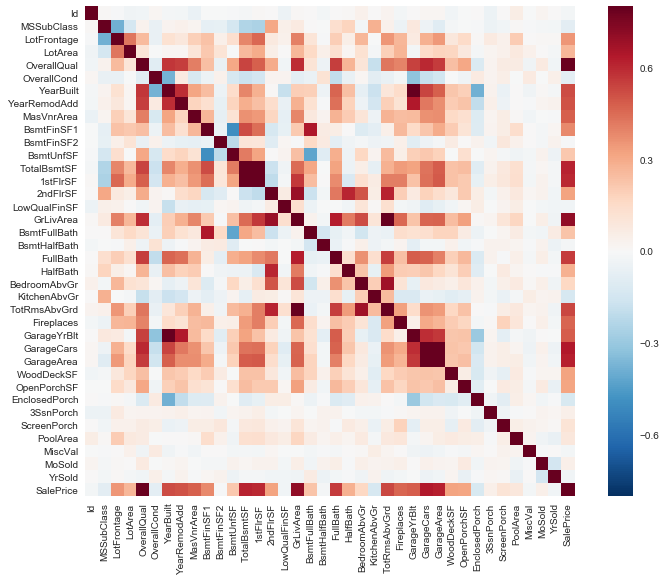

In [3]:
#A little bit of EDA
import seaborn as sns

corrmat2 = train_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=.8, square=True);

corrmat = train_all.corr()
print corrmat.loc[:,corrmat.columns=='SalePrice'].sort_values('SalePrice', ascending=False)

In [5]:
# Set up simplest linear regression model possible:
simple_LR = linear_model.LinearRegression()
simple_LR.fit(X = train_X.GrLivArea.values.reshape(-1, 1), y = train_y.values.reshape(-1, 1))

print("y-intercept: {:,.2f}".format(float(simple_LR.intercept_)))
print("GrLivArea coefficient: {:,.2f}".format(float(simple_LR.coef_)))

simple_LR_pred_labels = simple_LR.predict(dev_X.GrLivArea.values.reshape(-1, 1))
print("Log Root Mean Squared Error: {:,.2f}".format(metrics.mean_squared_error(np.log(dev_y), np.log(simple_LR_pred_labels)) ** 0.5))

# Calculate R-squared values of model.
print("R-squared: {:.2f}".format(metrics.r2_score(dev_y, simple_LR_pred_labels)))

y-intercept: 8,283.58
GrLivArea coefficient: 115.19
Log Root Mean Squared Error: 0.29
R-squared: 0.40


In [6]:
#Maybe Use Decision Tree/Random Forests to Pick Best Features?
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3, n_estimators=1000)

rf.fit(train_X,train_y)

features = np.where(rf.feature_importances_!=0)[0]
for i in features:
    print list(train_X)[i]

print len(features)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
MoSold
YrSold
MSZoning_RL
MSZoning_RM
LotShape_IR1
LotShape_IR2
LotShape_Reg
LandContour_HLS
LandContour_Lvl
LotConfig_Corner
LotConfig_CulDSac
LotConfig_Inside
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_StoneBr
RoofStyle_Gable
RoofStyle_Hip
RoofMatl_CompShg
RoofMatl_WdShngl
Exterior1st_CemntBd
Exterior1st_HdBoard
Exterior1st_Wd Sdng
Exterior2nd_HdBoard
Exterior2nd_MetalSd
Exterior2nd_VinylSd
Exterior2nd_Wd Shng
MasVnrType_None
ExterQual_Ex
ExterQual_Gd
Foundation_PConc
BsmtQual_Ex
BsmtQual_Gd
BsmtQual_TA
BsmtExposure_Gd
BsmtExposure_No
BsmtFinType1_ALQ
BsmtFinType1_GLQ
HeatingQC_Ex
CentralAir_N
CentralAir_Y
KitchenQual_Ex
KitchenQual_Gd
FireplaceQu_Ex


In [7]:
#pick the features that the random forest thought were the most important
train_X_sel = train_X.loc[:, train_X.columns[[features]]]
dev_X_sel = dev_X.loc[:, dev_X.columns[[features]]]

#fit the regression model using those columns only
rf_LR = linear_model.LinearRegression()
rf_LR.fit(X = train_X_sel, y = train_y)


print("y-intercept: {:,.2f}".format(float(rf_LR.intercept_)))
#print("Other Coefficients:", (rf_LR.coef_))

#make predictions
rf_LR_pred_labels = rf_LR.predict(dev_X_sel)

#print a few actual and predicted values
print dev_y[:10]
print rf_LR_pred_labels[:10]

#check the error
print("Log Root Mean Squared Error: {:,.4f}".format(metrics.mean_squared_error(np.log(dev_y), np.log(rf_LR_pred_labels)) ** 0.5))

# Calculate R-squared values of model.
print("R-squared: {:.2f}".format(metrics.r2_score(dev_y, rf_LR_pred_labels)))

y-intercept: 385,880.87
1000     82000
1001     86000
1002    232000
1003    136905
1004    181000
1005    149900
1006    163500
1007     88000
1008    240000
1009    102000
Name: SalePrice, dtype: int64
[  49893.86199878   97733.8216378   218553.73228412  142530.06443826
  193117.9638212   137795.43863433  213042.27566086   64760.97610598
  245427.48727528  101923.68962915]
Log Root Mean Squared Error: 0.1621
R-squared: 0.78


In [61]:
#Write out the csv of predictions
output = dev_X.copy()
output['SalePrice']=simple_LR.predict(output.GrLivArea.values.reshape(-1,1))
output.to_csv('Output.csv',columns=['Id','SalePrice'],index=False)